# Data Visualization of Bird Strikes

Import all the necessary libs

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [198]:
bsd = pd.read_csv("assets/cleaned_dataset.csv")

Print column names to verify

In [199]:
print(bsd.columns)

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')


Checking the format of the first few 'FlightDate' entries

In [200]:
print(bsd['FlightDate'].head())

0    7/25/01 0:00
1    9/14/01 0:00
2     9/5/02 0:00
3    6/23/03 0:00
4    7/24/03 0:00
Name: FlightDate, dtype: object


In [201]:
bsd["FlightDate"] = pd.to_datetime(bsd["FlightDate"])

bsd["Year"] = bsd["FlightDate"].dt.year
bsd["Month"] = bsd["FlightDate"].dt.month
bsd["Day"] = bsd["FlightDate"].dt.day
bsd["Hour"] = bsd["FlightDate"].dt.hour

C:\Users\reals\AppData\Local\Temp\ipykernel_17860\1506852794.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bsd["FlightDate"] = pd.to_datetime(bsd["FlightDate"])


Figure common dims

In [202]:
plt_dim = [20, 10]
pi_dim = [12, 20]

Number of Bird Strikes per Year

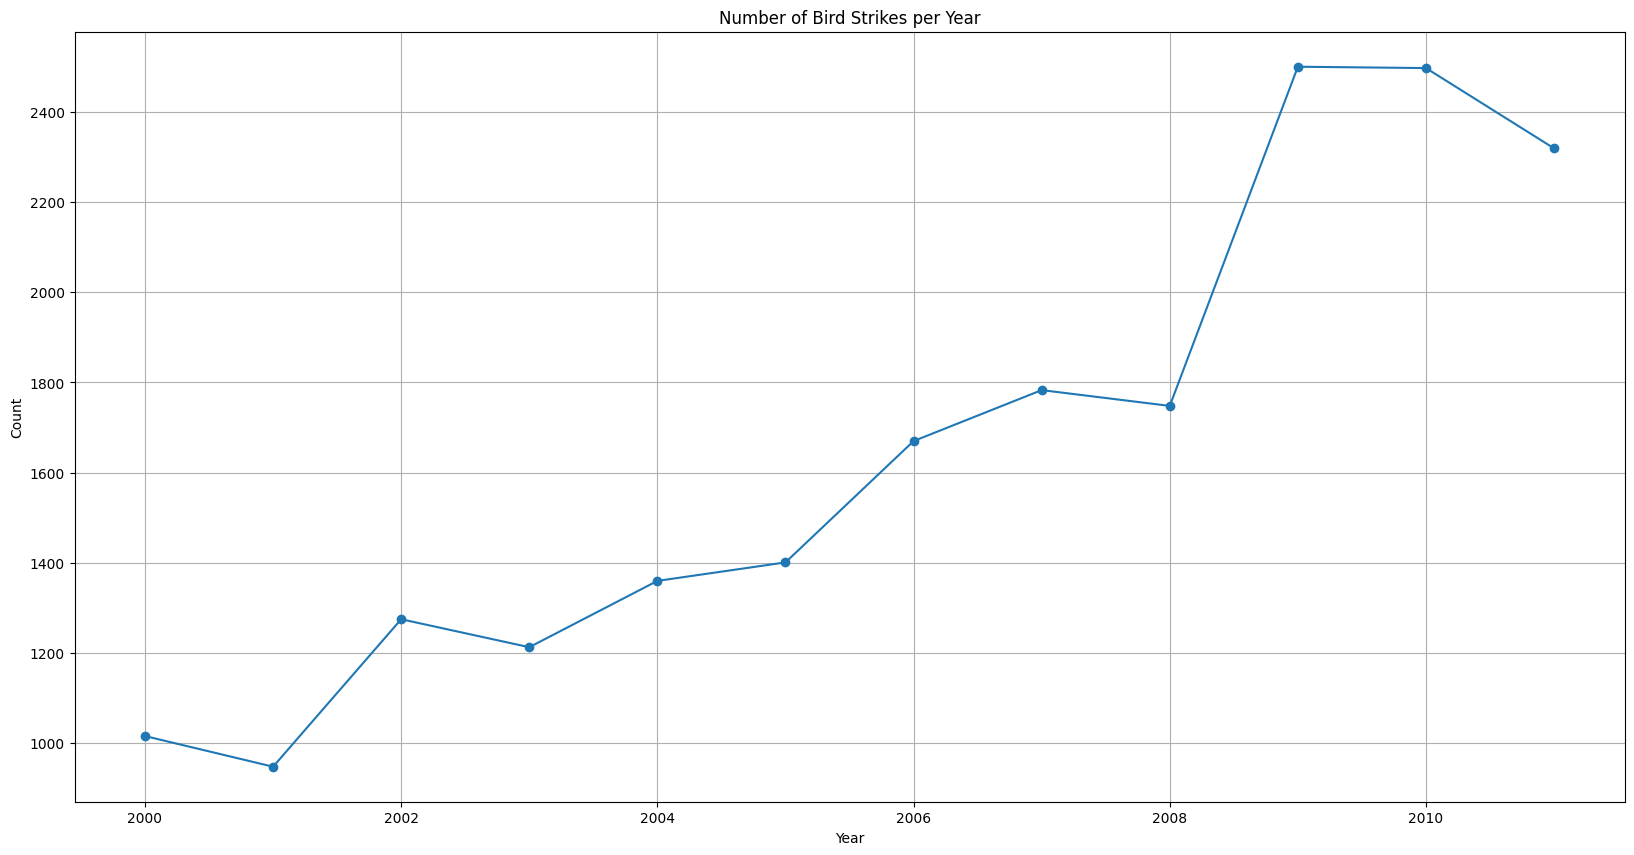

In [203]:
yearly_strikes = bsd.groupby("Year").size().reset_index(name="Count")
plt.figure(figsize=(plt_dim))
plt.plot(yearly_strikes["Year"], yearly_strikes["Count"], marker="o")
plt.title("Number of Bird Strikes per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Top 10 US Airlines in Terms of Bird Strikes

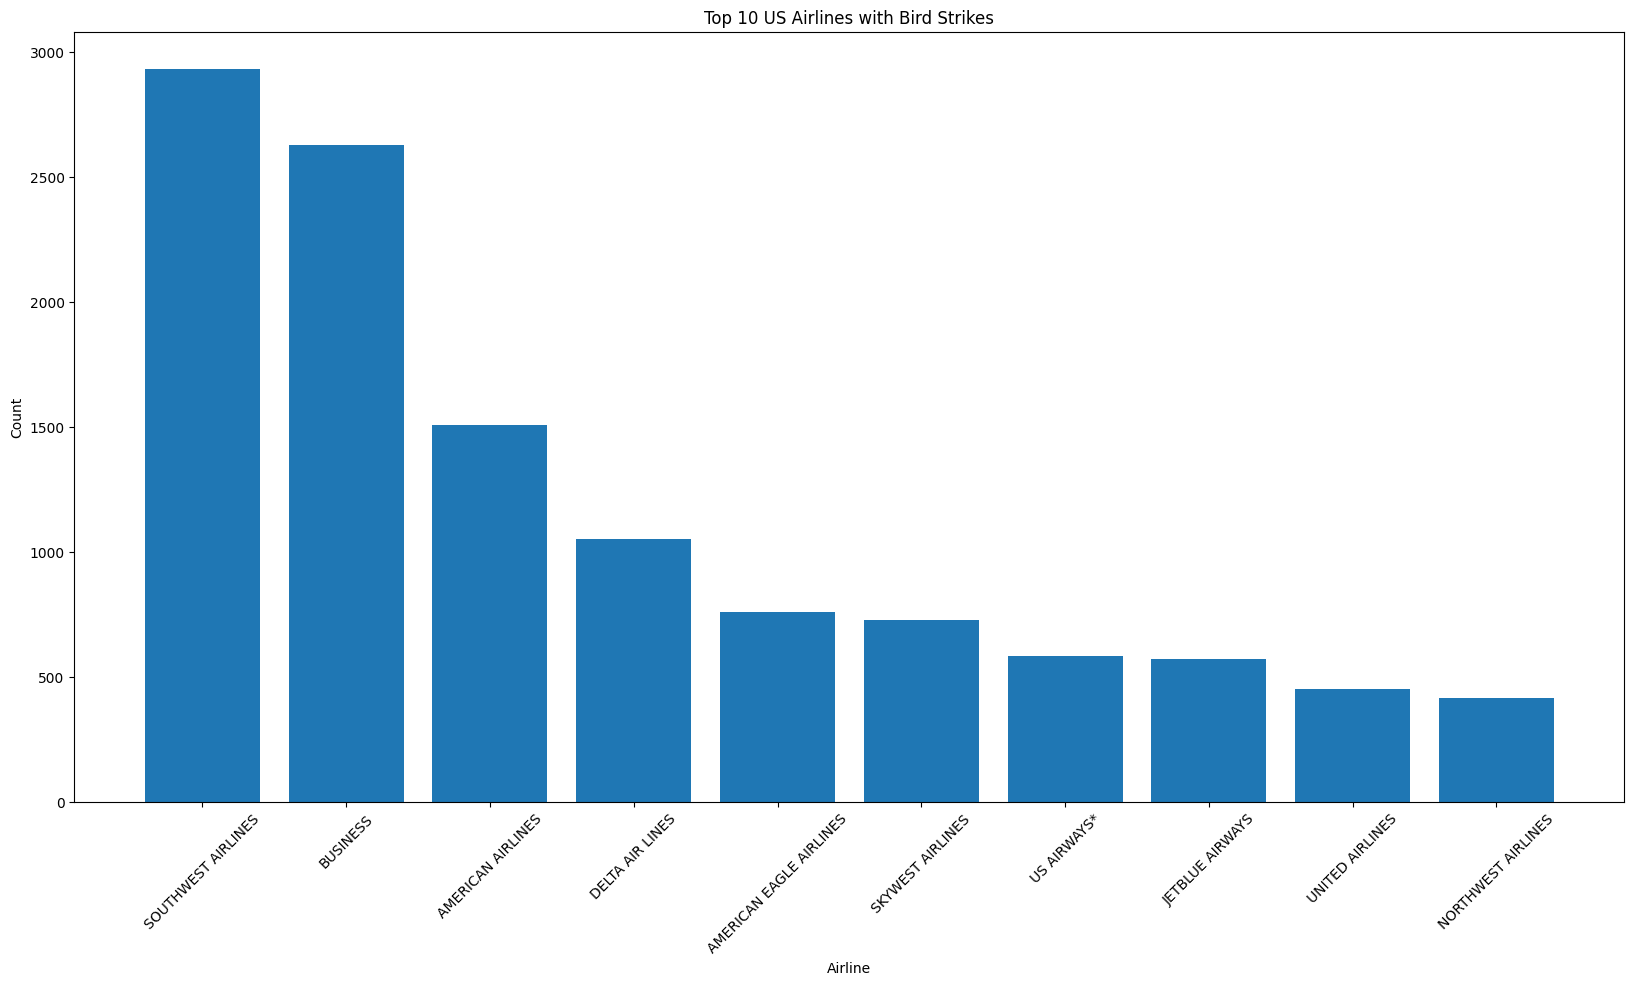

In [204]:
top_airlines = bsd["Aircraft: Airline/Operator"].value_counts().head(10).reset_index()
top_airlines.columns = ["Airline", "Count"]
plt.figure(figsize=(plt_dim))
plt.bar(top_airlines["Airline"], top_airlines["Count"])
plt.title("Top 10 US Airlines with Bird Strikes")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Top 50 Airports with Most Bird Strikes

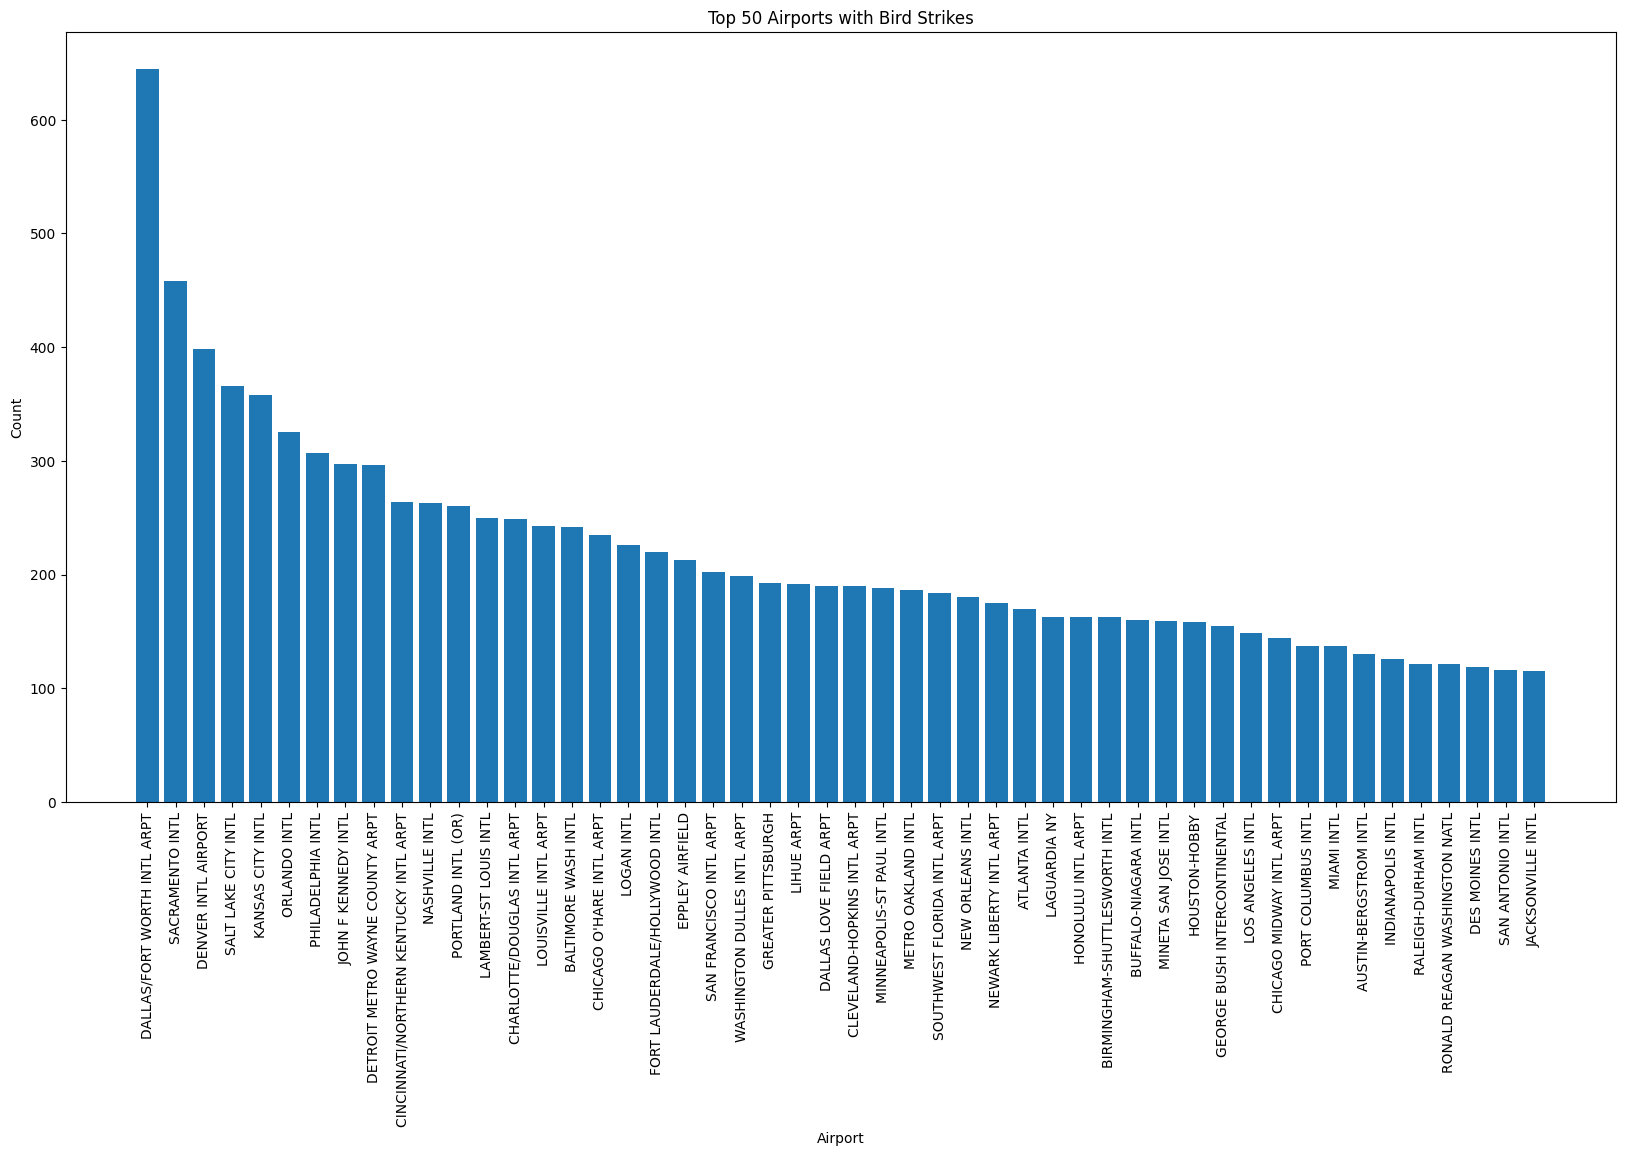

In [205]:
top_airports = bsd["Airport: Name"].value_counts().head(50).reset_index()
top_airports.columns = ["Airport", "Count"]
plt.figure(figsize=(plt_dim))
plt.bar(top_airports["Airport"], top_airports["Count"])
plt.title("Top 50 Airports with Bird Strikes")
plt.xlabel("Airport")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Yearly Cost Incurred due to Bird Strikes

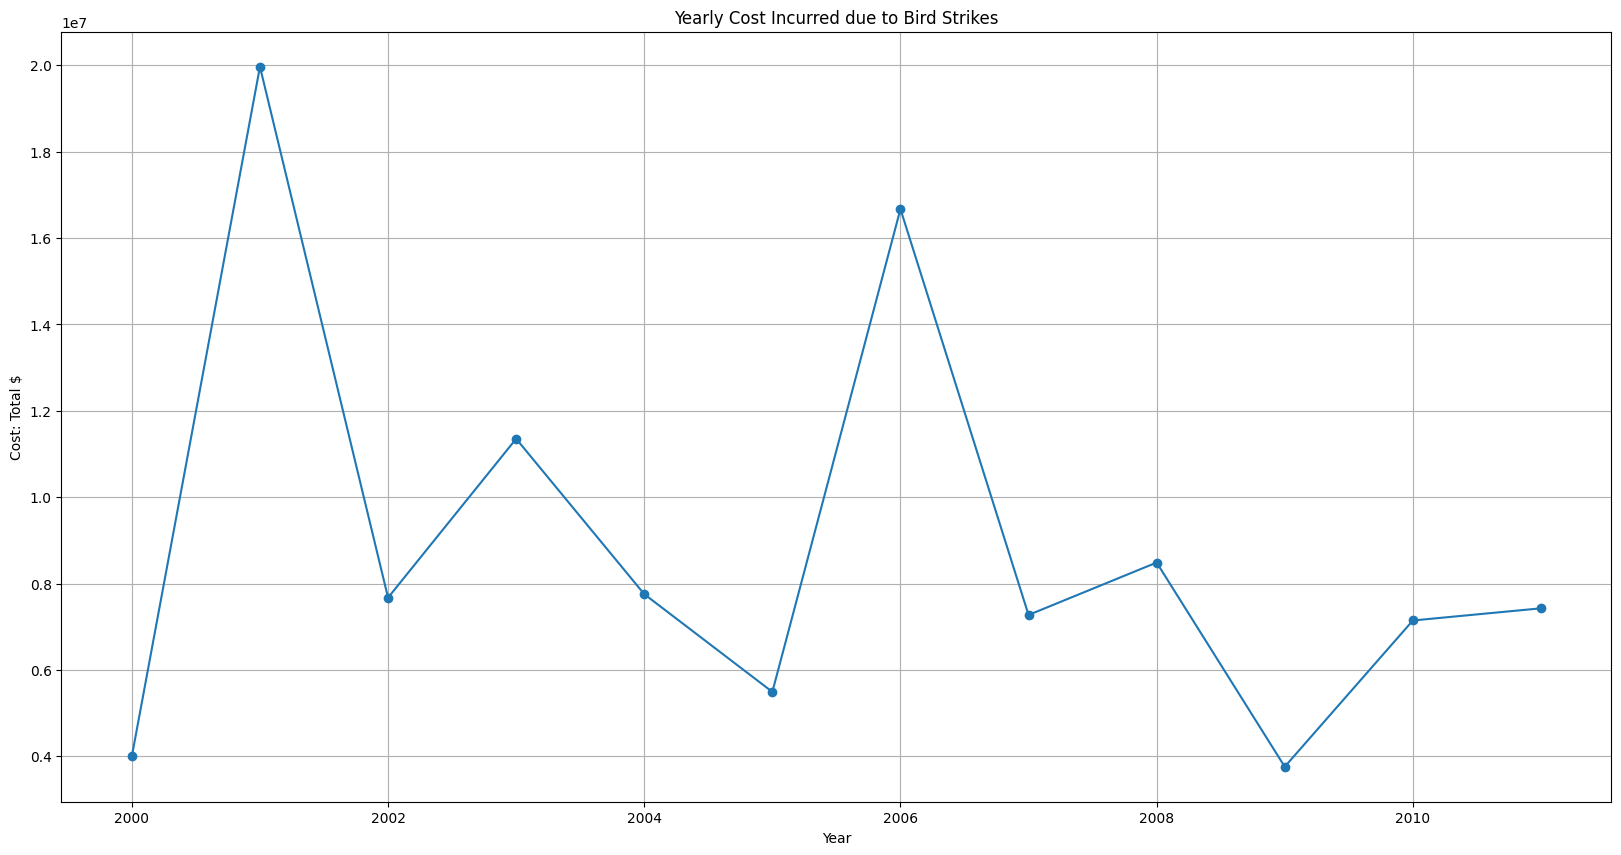

In [206]:
yearly_cost = bsd.groupby("Year")["Cost: Total $"].sum().reset_index()
plt.figure(figsize=(plt_dim))
plt.plot(yearly_cost["Year"], yearly_cost["Cost: Total $"], marker="o")
plt.title("Yearly Cost Incurred due to Bird Strikes")
plt.xlabel("Year")
plt.ylabel("Cost: Total $")
plt.grid(True)
plt.show()

When Do Most Bird Strikes Occur?

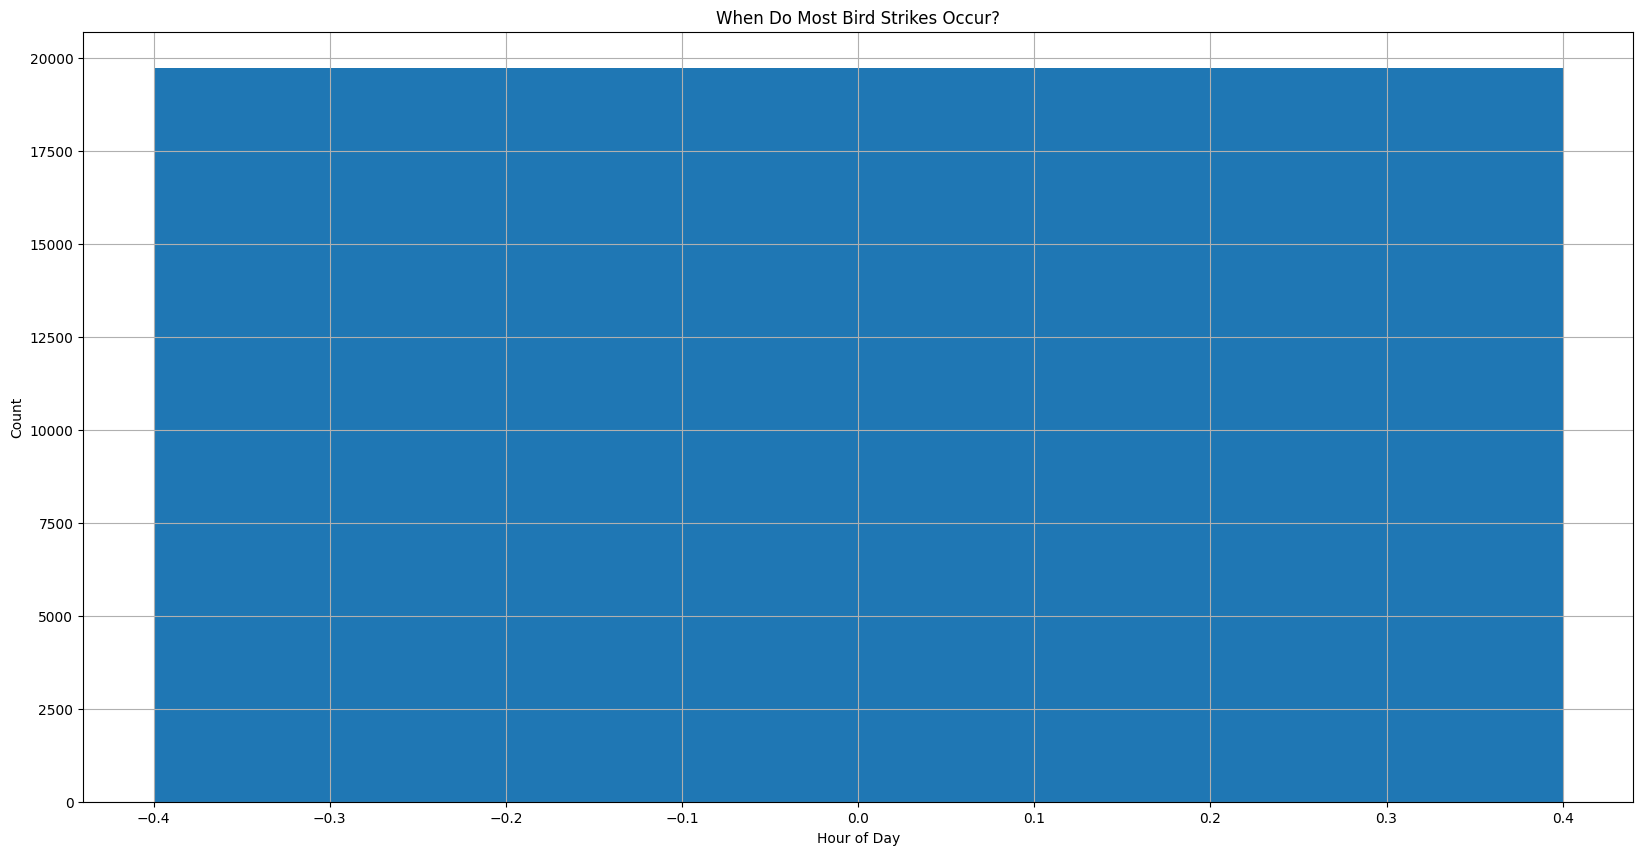

In [207]:
hourly_strikes = bsd.groupby("Hour").size().reset_index(name="Count")
plt.figure(figsize=(plt_dim))
plt.bar(hourly_strikes["Hour"], hourly_strikes["Count"])
plt.title("When Do Most Bird Strikes Occur?")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Altitude of Airplanes at the Time of Strike

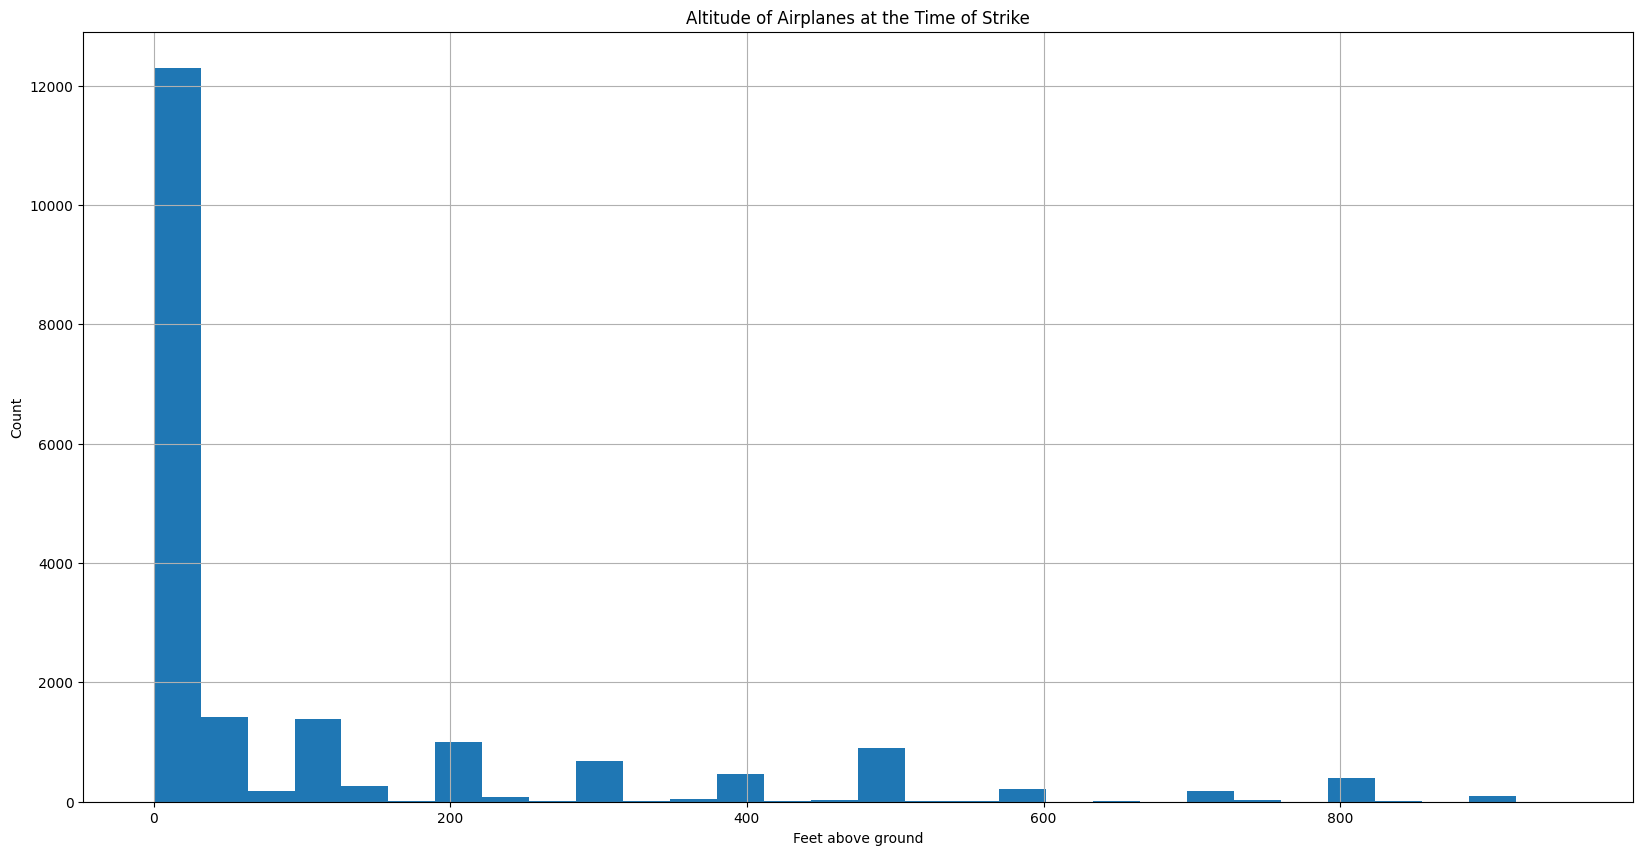

In [208]:
plt.figure(figsize=(plt_dim))
plt.hist(bsd["Feet above ground"].dropna(), bins=30)
plt.title("Altitude of Airplanes at the Time of Strike")
plt.xlabel("Feet above ground")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Phase of Flight at the Time of the Strike

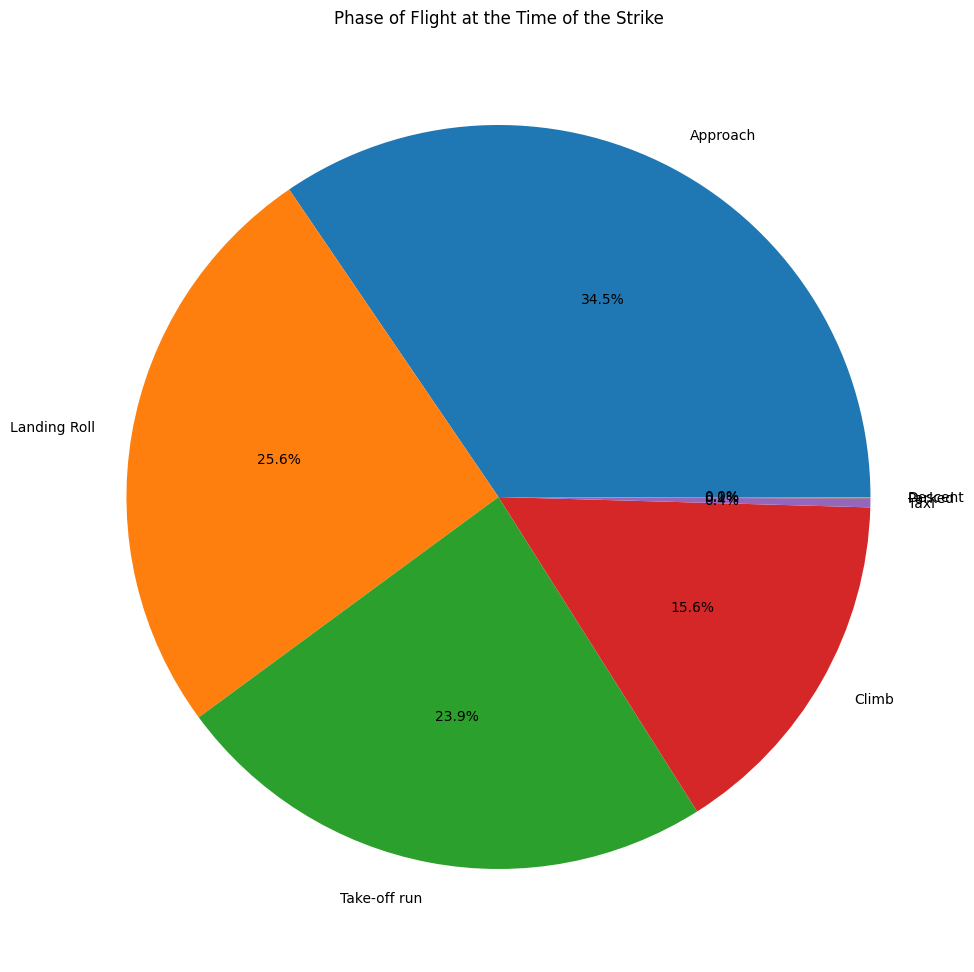

In [209]:
phase_of_flight = bsd["When: Phase of flight"].value_counts().reset_index()
phase_of_flight.columns = ["Flight Phase", "Count"]
plt.figure(figsize=(pi_dim))
plt.pie(
    phase_of_flight["Count"], labels=phase_of_flight["Flight Phase"], autopct="%1.1f%%"
)
plt.title("Phase of Flight at the Time of the Strike")
plt.show()

Average Altitude of Airplanes in Different Phases at the Time of Strike

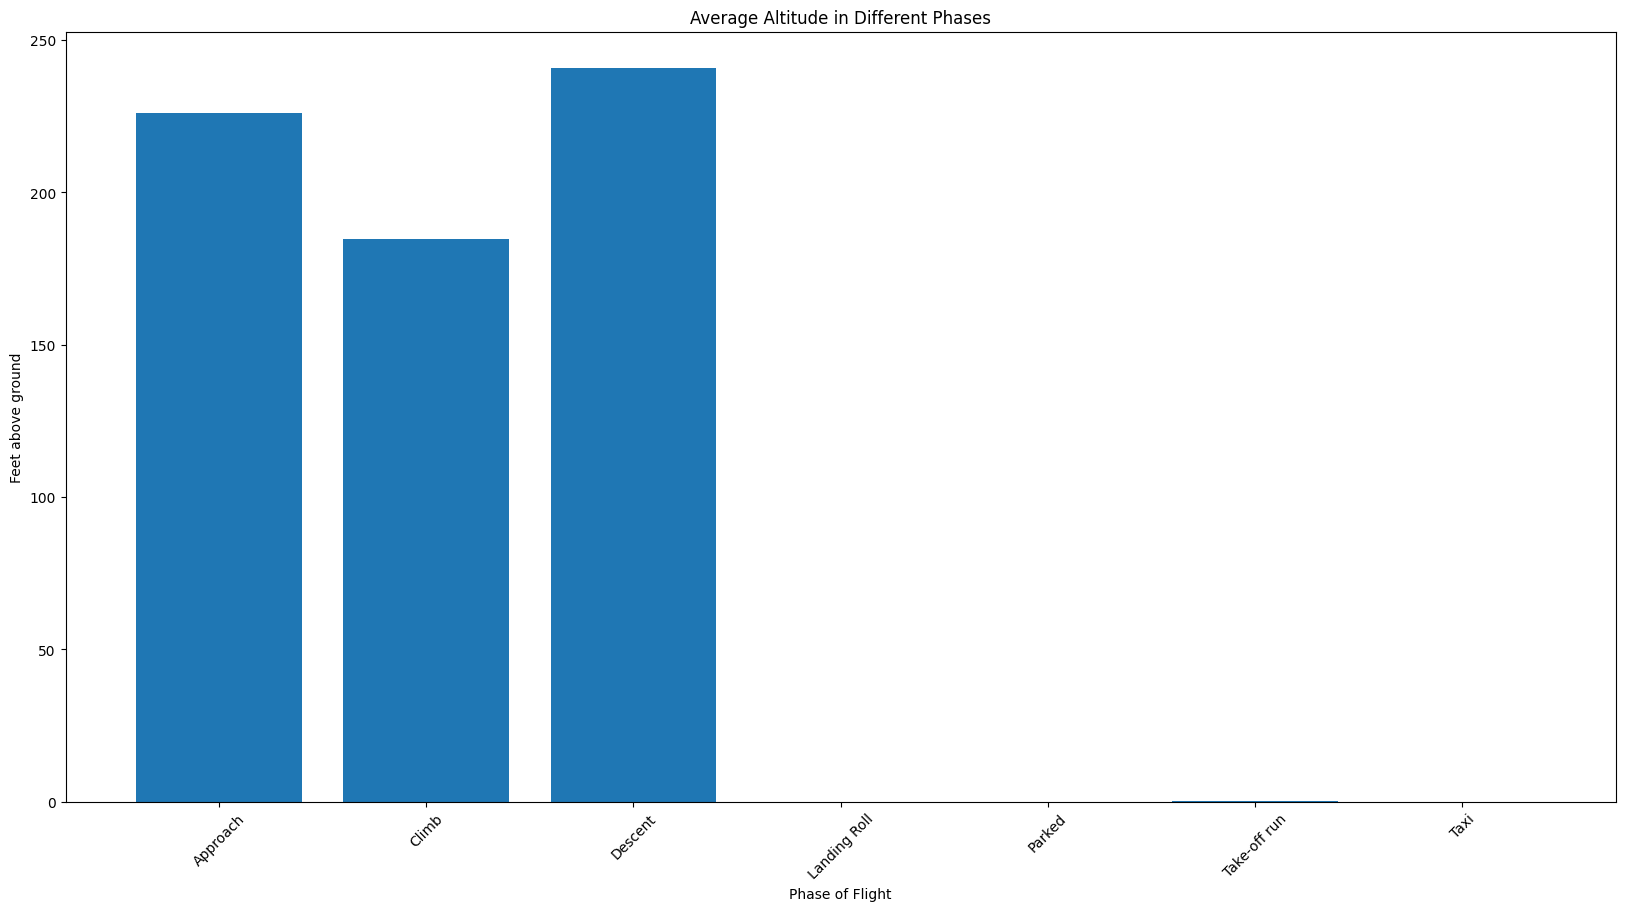

In [210]:
avg_altitude_phase = (
    bsd.groupby("When: Phase of flight")["Feet above ground"].mean().reset_index()
)
plt.figure(figsize=(plt_dim))
plt.bar(
    avg_altitude_phase["When: Phase of flight"], avg_altitude_phase["Feet above ground"]
)
plt.title("Average Altitude in Different Phases")
plt.xlabel("Phase of Flight")
plt.ylabel("Feet above ground")
plt.xticks(rotation=45)
plt.show()

Effect of Bird Strikes & Impact on Flight

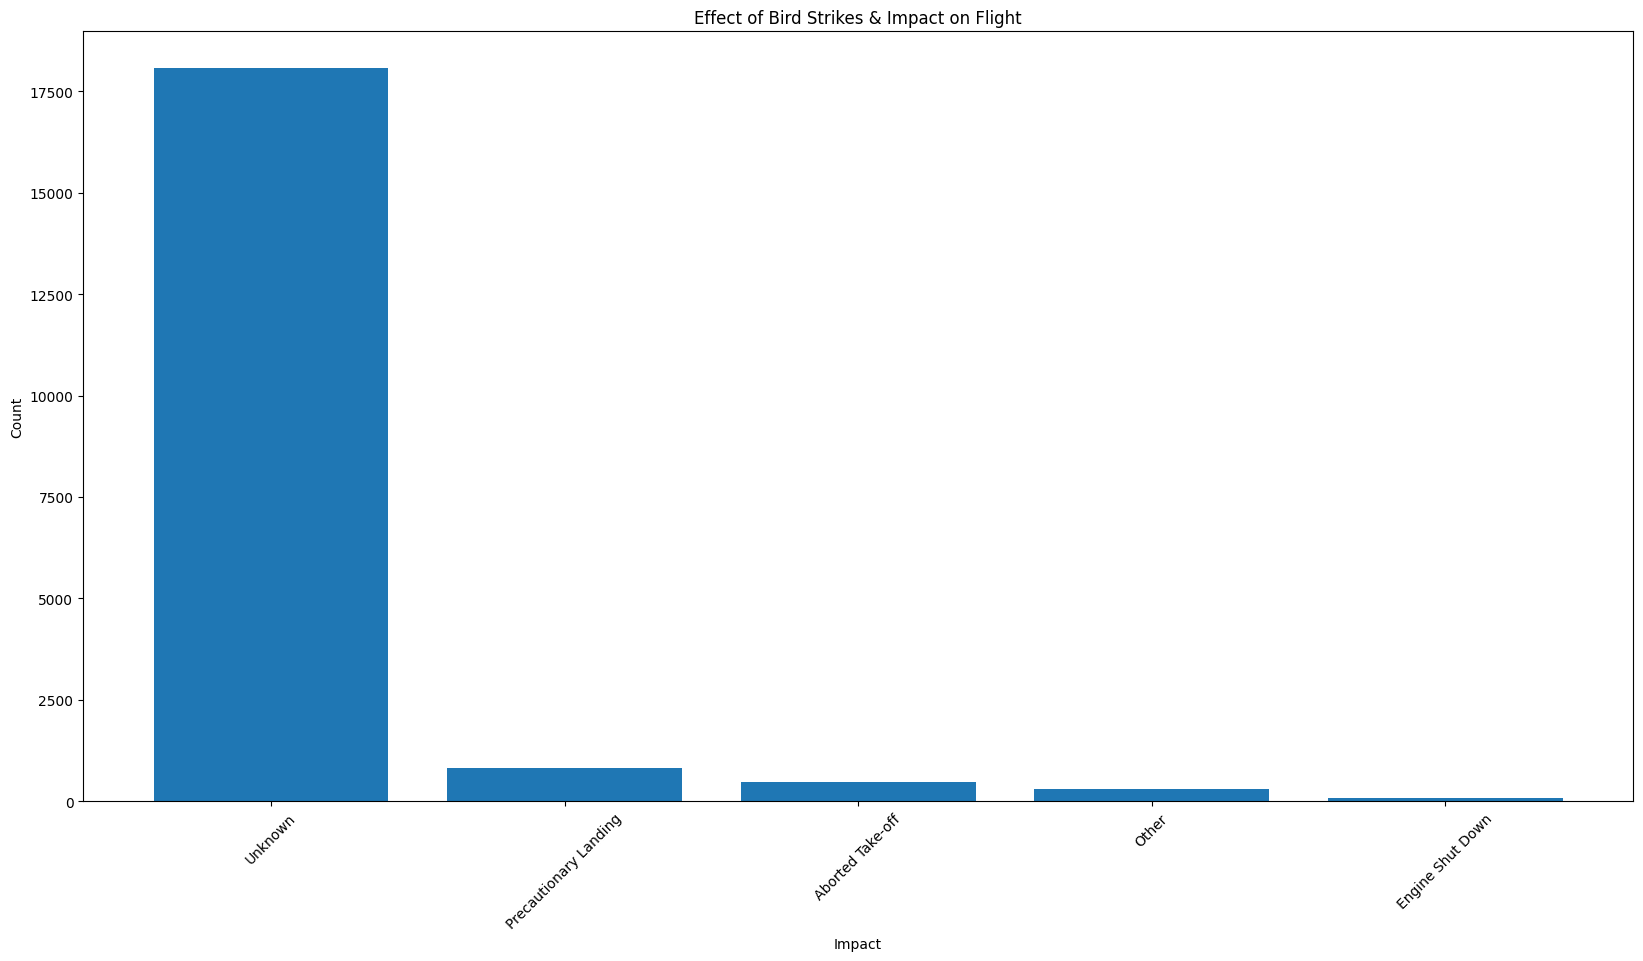

In [211]:
effect_impact = bsd["Effect: Impact to flight"].value_counts().reset_index()
effect_impact.columns = ["Impact", "Count"]
plt.figure(figsize=(plt_dim))
plt.bar(effect_impact["Impact"], effect_impact["Count"])
plt.title("Effect of Bird Strikes & Impact on Flight")
plt.xlabel("Impact")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Effect of Strike at Different Altitudes

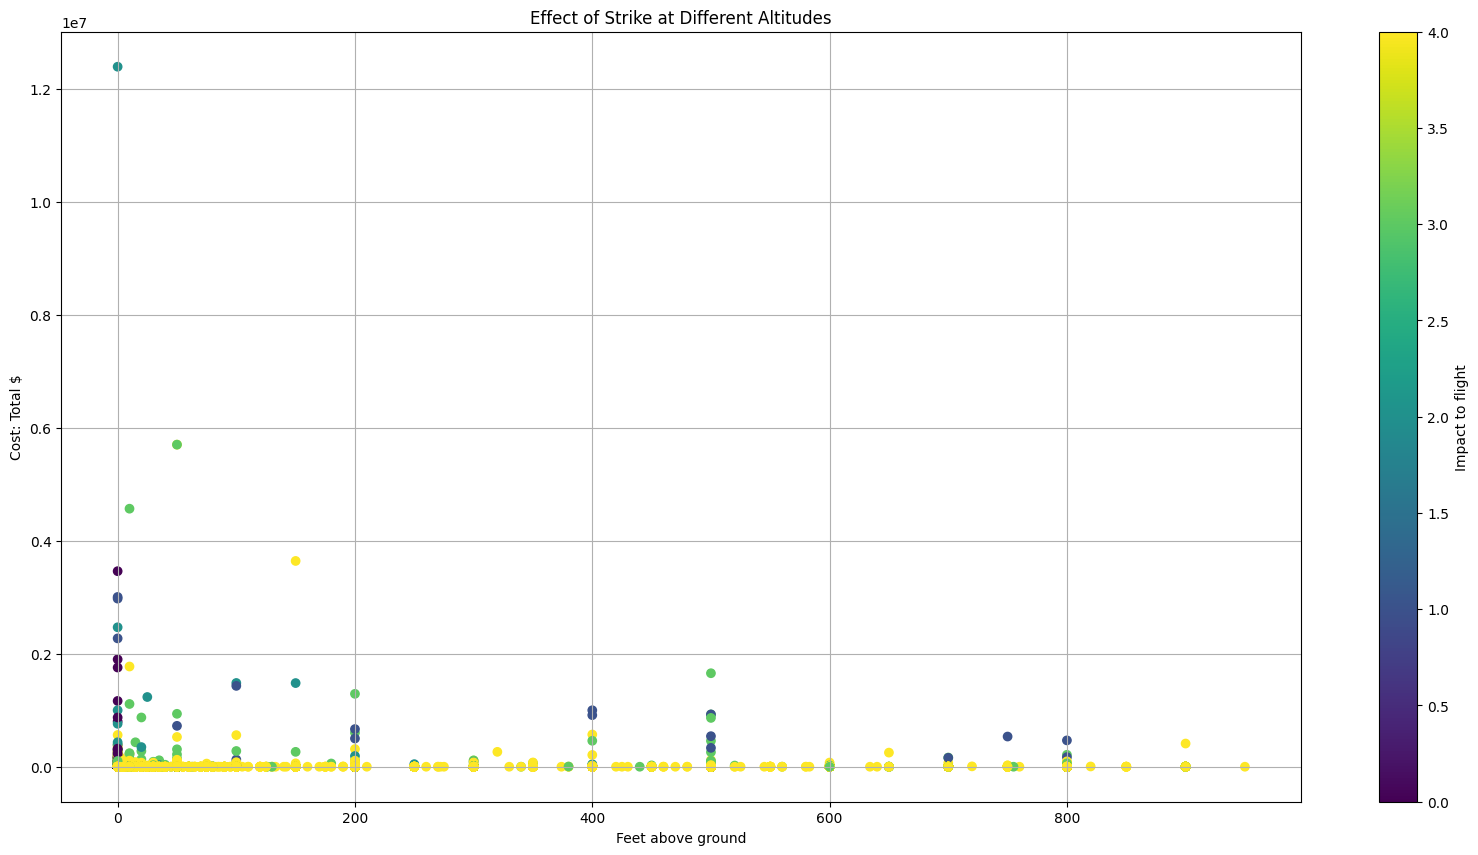

In [212]:
plt.figure(figsize=(plt_dim))
plt.scatter(
    bsd["Feet above ground"],
    bsd["Cost: Total $"],
    c=bsd["Effect: Impact to flight"].astype("category").cat.codes,
    cmap="viridis",
)
plt.title("Effect of Strike at Different Altitudes")
plt.xlabel("Feet above ground")
plt.ylabel("Cost: Total $")
plt.colorbar(label="Impact to flight")
plt.grid(True)
plt.show()

Were Pilots Informed?

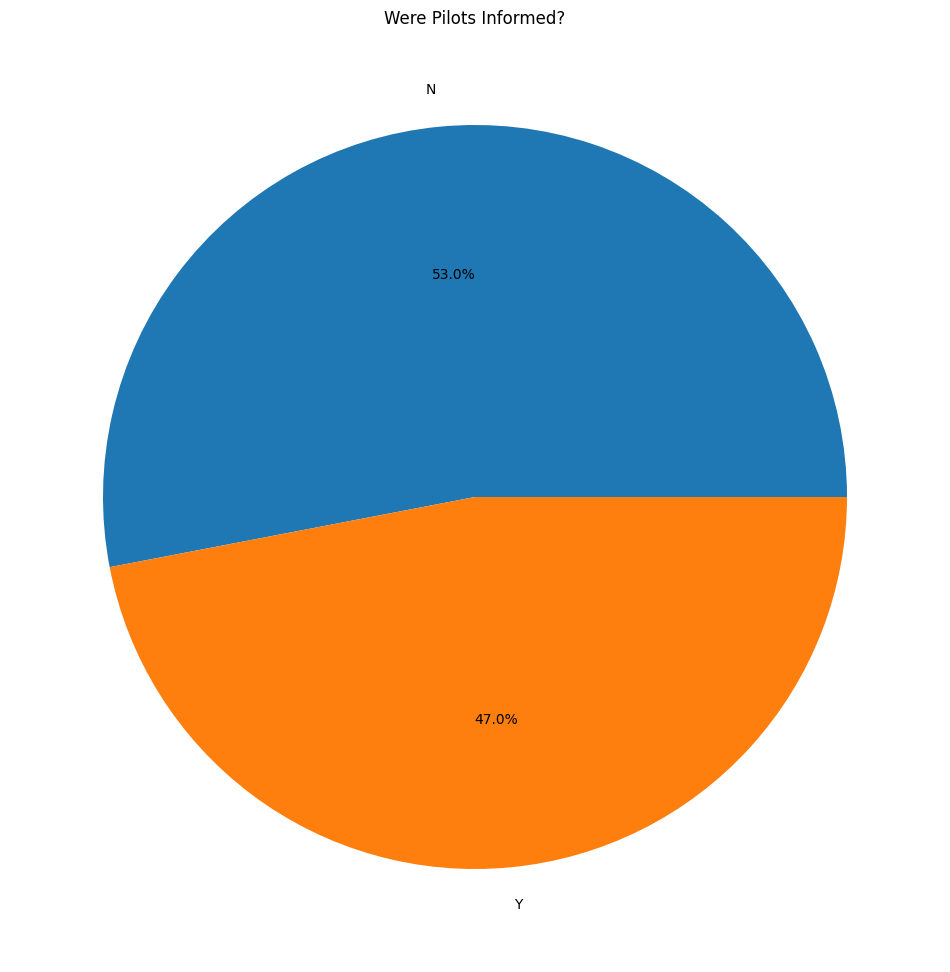

In [213]:
pilots_informed = bsd["Pilot warned of birds or wildlife?"].value_counts().reset_index()
pilots_informed.columns = ["Pilot Warned", "Count"]
plt.figure(figsize=(pi_dim))
plt.pie(
    pilots_informed["Count"], labels=pilots_informed["Pilot Warned"], autopct="%1.1f%%"
)
plt.title("Were Pilots Informed?")
plt.show()